# Approximation d'une fonction à 2 variables par un réseau de neurones

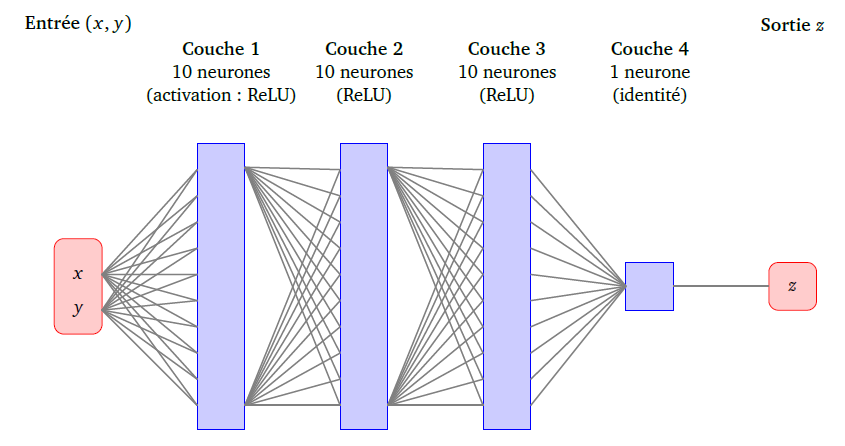

1. le modèle rentre les valeurs de x et y
2. il estime alors la valeurs de la fonction cad z

## 1. modules à charger

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Données

In [ ]:
# Fonction à approcher
def f(x,y):
    return x*np.cos(y)

n = 25  # pour le nb de points dans la grille
xmin, xmax, ymin, ymax = -4.0, 4.0, -4.0, 4.0

VX = np.linspace(xmin, xmax, n)
VY = np.linspace(ymin, ymax, n)
X, Y = np.meshgrid(VX, VY)
Z = f(X, Y)

entree = np.append(X.reshape(-1,1), Y.reshape(-1,1), axis=1)
sortie = Z.reshape(-1, 1)




## 3. Réseau

In [ ]:
modele = Sequential()
p = 10
modele.add(Dense(p, input_dim=2, activation='relu'))
modele.add(Dense(p, activation='relu'))
modele.add(Dense(p, activation='relu'))
modele.add(Dense(1, activation='linear'))

# Méthode de gradient : descente de gradient classique
mysgd = optimizers.SGD(lr=0.01)
modele.compile(loss='mean_squared_error', optimizer=mysgd)
print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
None


## 4. Entrainement du modèle

In [ ]:
# Apprentissage époque par époque à la main
for k in range(1000):
    loss = modele.train_on_batch(entree, sortie)
    print('Erreur :',loss)

Erreur : 3.52239990234375
Erreur : 3.4690918922424316
Erreur : 3.421679735183716
Erreur : 3.3778438568115234
Erreur : 3.337296962738037
Erreur : 3.2990012168884277
Erreur : 3.262695789337158
Erreur : 3.227146625518799
Erreur : 3.192046642303467
Erreur : 3.158782720565796
Erreur : 3.1268656253814697
Erreur : 3.0967776775360107
Erreur : 3.070014238357544
Erreur : 3.0461063385009766
Erreur : 3.0245823860168457
Erreur : 3.0050904750823975
Erreur : 2.987043857574463
Erreur : 2.9699418544769287
Erreur : 2.9536776542663574
Erreur : 2.9379701614379883
Erreur : 2.9230458736419678
Erreur : 2.908687114715576
Erreur : 2.8948004245758057
Erreur : 2.8810665607452393
Erreur : 2.867567539215088
Erreur : 2.8543992042541504
Erreur : 2.8412203788757324
Erreur : 2.828190326690674
Erreur : 2.8157269954681396
Erreur : 2.8032851219177246
Erreur : 2.790896415710449
Erreur : 2.7786178588867188
Erreur : 2.766336679458618
Erreur : 2.7540817260742188
Erreur : 2.741821765899658
Erreur : 2.7295310497283936
Erreur :

## 5. Visualisation

20/20 [==============================] - 0s 2ms/step


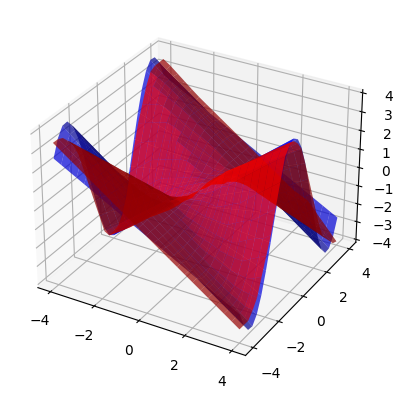

In [ ]:
sortie_produite = modele.predict(entree)
ZZ = sortie_produite.reshape(Z.shape)  # sortie produite aux bonnes dimensions

# Affichage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, color='blue', alpha=0.7)
ax.plot_surface(X, Y, ZZ, color='red', alpha=0.7)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')